In [1]:
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
import random

In [3]:
def Data_Pre_Processing(DATA_DIR,CATEGORIES):
    training_data=[]
    IMG_SIZE=200
    def create_training_data():
        for category in CATEGORIES:
            path=os.path.join(DATA_DIR,category) #path to cats and dogs
            class_num=CATEGORIES.index(category)
            for img in os.listdir(path):
                try:
                    img_arr=cv2.imread(os.path.join(path,img))
                    img_arr=cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                    new_array=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
                    training_data.append([new_array,class_num])
                except Exception as e:
                    pass
        
    create_training_data()
    random.shuffle(training_data)
    
    X=[]
    y=[]

    for features,label in training_data:
        X.append(features)
        y.append(label)


    X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)


    return X,y

In [4]:
dirname = os.getcwd()
imges_folder = "images"  
DATA_DIR = dirname +"\\"+imges_folder
print(DATA_DIR)

D:\A.H\Python\Fiver_X-ray\images


In [5]:
categories = ['nodule','non-nodule']

In [6]:
X,y = Data_Pre_Processing(DATA_DIR,categories)

In [7]:
len(X)

5087

In [8]:
for i in range(5):
    print(y[i])

1
0
0
1
0


In [9]:
input_shape = (200, 200, 3)

In [10]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [13]:
X_train=X[:4887]
X_test=X[4887:]
y_train=y[:4887]
y_test=y[4887:]

In [14]:
len(X_train)

4887

In [15]:
len(X_test)

200

In [17]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output =tensorflow.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

# vgg_model.trainable = False
# for layer in vgg_model.layers:
#     layer.trainable = False

58892288/58889256 [==============================] - 209s 4us/step


In [18]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [19]:
bin_model = Sequential()
bin_model.add(vgg_model)
bin_model.add(Dense(512, activation='relu', input_dim=input_shape))
bin_model.add(Dropout(0.3))
bin_model.add(Dense(512, activation='relu'))
bin_model.add(Dropout(0.3))
bin_model.add(Dense(1, activation='sigmoid'))

bin_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
bin_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 18432)             14714688  
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 24,415,553
Trainable params: 22,680,065
Non-trainable params: 1,735,488
____________________________________

In [20]:
history = bin_model.fit(X_train,np.array(y_train),epochs=10,
                              validation_split=0.2)

Train on 3909 samples, validate on 978 samples
Epoch 1/10
3909/3909 [==============================] - 1101s 282ms/sample - loss: 1.1026 - accuracy: 0.5293 - val_loss: 0.6780 - val_accuracy: 0.5481
Epoch 2/10
3909/3909 [==============================] - 1099s 281ms/sample - loss: 0.6545 - accuracy: 0.6163 - val_loss: 0.6216 - val_accuracy: 0.6288
Epoch 3/10
3909/3909 [==============================] - 1100s 282ms/sample - loss: 0.5539 - accuracy: 0.7004 - val_loss: 0.5767 - val_accuracy: 0.6840
Epoch 4/10
3909/3909 [==============================] - 1101s 282ms/sample - loss: 0.4312 - accuracy: 0.7882 - val_loss: 0.4595 - val_accuracy: 0.7699
Epoch 5/10
3909/3909 [==============================] - 1102s 282ms/sample - loss: 0.3071 - accuracy: 0.8647 - val_loss: 0.4729 - val_accuracy: 0.7710
Epoch 6/10
3909/3909 [==============================] - 1102s 282ms/sample - loss: 0.2078 - accuracy: 0.9138 - val_loss: 0.3604 - val_accuracy: 0.8354
Epoch 7/10
3909/3909 [=========================

In [21]:
import h5py

In [22]:
bin_model.save("bin_model.h5")

In [23]:
history.history

{'loss': [1.1026019721300775,
  0.6545006804345483,
  0.5538912443713356,
  0.43123271258537893,
  0.307081796333716,
  0.207830372933812,
  0.134214445727504,
  0.086519653453611,
  0.052924235011853886,
  0.03893074126672823],
 'accuracy': [0.5292914,
  0.6162701,
  0.7004349,
  0.7881811,
  0.8646713,
  0.9137887,
  0.94781274,
  0.96879,
  0.9805577,
  0.98516244],
 'val_loss': [0.6779595119821513,
  0.621563631454616,
  0.5767211775106886,
  0.4595412077469816,
  0.4728801486316634,
  0.3604124864308137,
  0.5441974530068887,
  0.2289786695337003,
  0.31795747299318666,
  0.3104933578147722],
 'val_accuracy': [0.54805726,
  0.62883437,
  0.68404907,
  0.76993865,
  0.77096117,
  0.83537835,
  0.7985685,
  0.90593046,
  0.8813906,
  0.88752556]}

In [24]:
import matplotlib.pyplot as plt

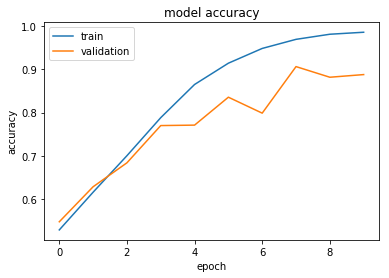

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [28]:
results=bin_model.evaluate(X_test,np.array(y_test))
print("test loss","test acc:",results)

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
import pickle


In [30]:
pickle_out = open("X_train","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

In [31]:
pickle_out = open("y_train","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [32]:
pickle_out = open("X_test","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

In [33]:
pickle_out = open("y_test","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [26]:
import requests
from PIL import Image
import urllib
import numpy as np
import tensorflow as tf
import h5py
import cv2

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('model.h5',compile=False)

In [ ]:
img_arr= cv2.imread("dog-1210559__340.jpg")
img =cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [ ]:
IMG_SIZE=200
new_array=cv2.resize(img,(IMG_SIZE,IMG_SIZE))

In [ ]:
image = np.expand_dims(new_array, axis=0)
#model_input = np.array([new_array])

In [ ]:
prediction = model.predict([image])

In [ ]:
prediction

In [ ]:
prediction[0][0]

In [ ]:
X.shape

In [ ]:
img_arr=cv2.imread(os.path.join(path,img))
                    img_arr=cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                    